In [1]:
import torch
import numpy as np
import pandas as pd

torch.cuda.is_available()

True

In [2]:
Y_df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/ERCOT-clean.csv')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df.head()

,unique_id,ds,y
0,ERCOT,2021-01-01 00:00:00,43719.849616
1,ERCOT,2021-01-01 01:00:00,43321.050347
2,ERCOT,2021-01-01 02:00:00,43063.067063
3,ERCOT,2021-01-01 03:00:00,43090.059203
4,ERCOT,2021-01-01 04:00:00,43486.590073


In [3]:
from ray import tune

from neuralforecast.auto import AutoTFT
from neuralforecast.core import NeuralForecast
from neuralforecast.losses.pytorch import MAE

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)

In [4]:
horizon = 24
models = [AutoTFT(h=horizon,
                  loss=MAE(),
                  config=None,
                  num_samples=3)]

In [5]:
nf = NeuralForecast(
    models=models,
    freq='H')

nf.fit(df=Y_df)

(train_tune pid=12025) 2023-02-03 14:09:38.412535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
(train_tune pid=12025) To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
(train_tune pid=12025) 2023-02-03 14:09:47.116699: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
(train_tune pid=12025) 2023-02-03 14:09:47.116831: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda

Sanity Checking: 0it [00:00, ?it/s] 
Epoch 99:  50%|█████     | 1/2 [00:00<00:00, 22.27it/s, loss=3.76e+04, v_num=0, train_loss_step=3.49e+4, train_loss_epoch=3.49e+4]
Validation: 0it [00:00, ?it/s]0m 
Epoch 199:  50%|█████     | 1/2 [00:00<00:00, 23.16it/s, loss=8.43e+03, v_num=0, train_loss_step=8.4e+3, train_loss_epoch=8.52e+3, val_loss=3.18e+4] 
Validation: 0it [00:00, ?it/s]0m 
Epoch 299:  50%|█████     | 1/2 [00:00<00:00, 23.85it/s, loss=8.18e+03, v_num=0, train_loss_step=7.83e+3, train_loss_epoch=8.55e+3, val_loss=6.02e+3]
Validation: 0it [00:00, ?it/s]0m 
Epoch 399:  50%|█████     | 1/2 [00:00<00:00, 23.41it/s, loss=8.28e+03, v_num=0, train_loss_step=8.31e+3, train_loss_epoch=8.53e+3, val_loss=5.89e+3]
Validation: 0it [00:00, ?it/s]0m 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(train_tune pid=12025) 
Epoch 499:  50%|█████     | 1/2 [00:00<00:00, 21.81it/s, loss=8.25e+03, v_num=0, train_loss_step=8.13e+3, train_loss_epoch=7.95e+3, val_loss=5.89e+3]
Validatio

Missing logger folder: /mnt/276CE6AF4D37CF1C/proj_kaggle/microbiz/lightning_logs
2023-02-03 14:11:39.517436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 14:11:40.083842: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-02-03 14:11:40.083990: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
202

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [6]:
Y_hat_df = nf.predict()
Y_hat_df.head()

Predicting: 0it [00:00, ?it/s]

,ds,AutoTFT
unique_id,,
ERCOT,2022-10-01 00:00:00,41044.187500
ERCOT,2022-10-01 01:00:00,44394.914062
ERCOT,2022-10-01 02:00:00,45196.335938
ERCOT,2022-10-01 03:00:00,45298.542969
ERCOT,2022-10-01 04:00:00,45312.171875


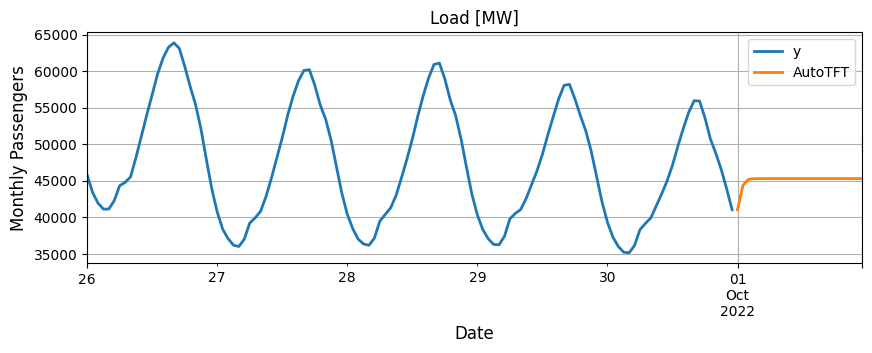

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (10, 3))
plot_df = pd.concat([Y_df.tail(24*5).reset_index(drop=True), Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'AutoTFT']].plot(ax=ax, linewidth=2)

ax.set_title('Load [MW]', fontsize=12)
ax.set_ylabel('Monthly Passengers', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(prop={'size': 10})
ax.grid()